In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sn
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from functions import crosscorrelations_target_single_plot
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("prescribed_treatment_data_climate.csv", index_col=0)

In [3]:
train_val, test = train_test_split(df, test_size=0.2, train_size=0.8, random_state=123)


In [6]:
selected_features = [
       'incident_longitude', 'incident_latitude', 
       'prescribed_3_months_in_5km', 'prescribed_3_months_size_5km',
       'prescribed_3_months_in_10km', 'prescribed_3_months_size_10km',
       'prescribed_3_months_in_25km', 'prescribed_3_months_size_25km',
       'prescribed_3_months_in_50km', 'prescribed_3_months_size_50km',
       'prescribed_3_months_in_100km', 'prescribed_3_months_size_100km',
       'prescribed_6_months_in_5km', 'prescribed_6_months_size_5km',
       'prescribed_6_months_in_10km', 'prescribed_6_months_size_10km',
       'prescribed_6_months_in_25km', 'prescribed_6_months_size_25km',
       'prescribed_6_months_in_50km', 'prescribed_6_months_size_50km',
       'prescribed_6_months_in_100km', 'prescribed_6_months_size_100km',
       'prescribed_12_months_in_5km', 'prescribed_12_months_size_5km',
       'prescribed_12_months_in_10km', 'prescribed_12_months_size_10km',
       'prescribed_12_months_in_25km', 'prescribed_12_months_size_25km',
       'prescribed_12_months_in_50km', 'prescribed_12_months_size_50km',
       'prescribed_12_months_in_100km', 'prescribed_12_months_size_100km',
       'prescribed_24_months_in_5km', 'prescribed_24_months_size_5km',
       'prescribed_24_months_in_10km', 'prescribed_24_months_size_10km',
       'prescribed_24_months_in_25km', 'prescribed_24_months_size_25km',
       'prescribed_24_months_in_50km', 'prescribed_24_months_size_50km',
       'prescribed_24_months_in_100km', 'prescribed_24_months_size_100km',
       'prescribed_36_months_in_5km', 'prescribed_36_months_size_5km',
       'prescribed_36_months_in_10km', 'prescribed_36_months_size_10km',
       'prescribed_36_months_in_25km', 'prescribed_36_months_size_25km',
       'prescribed_36_months_in_50km', 'prescribed_36_months_size_50km',
       'prescribed_36_months_in_100km', 'prescribed_36_months_size_100km',
       'soil moisture', 'temp_avg_Value', 'temp_min_Value', 'temp_max_Value',
       'precip_new_Value', 'pdsi_Value', 'phdi_Value', 'pmdi_Value',
       'pzi_Value']

In [7]:
# min max scale
scaler = MinMaxScaler().fit(train_val[selected_features].fillna(0).astype(float))
x_train = pd.DataFrame(scaler.transform(train_val[selected_features].fillna(0).astype(float)), columns=selected_features)
x_test = pd.DataFrame(scaler.transform(test[selected_features].fillna(0).astype(float)), columns=selected_features)
y_train = train_val["log_incident_acres_burned"].reset_index(drop=True)
y_test = test["log_incident_acres_burned"].reset_index(drop=True)

In [10]:
len(selected_features)

61

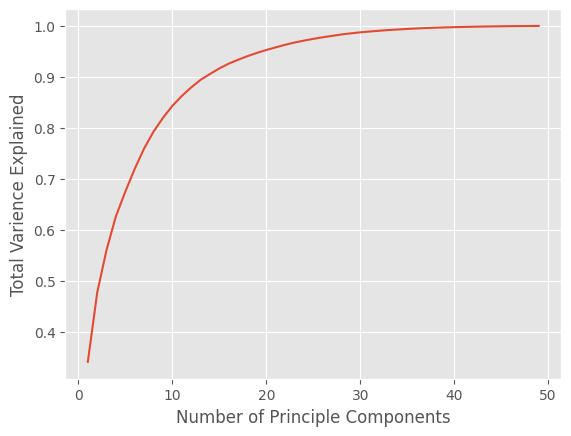

In [15]:
var = []
for i in range(1, 50):
    pca = PCA(i)
    pca.fit(x_train)
    var.append(sum(pca.explained_variance_ratio_))

plt.plot([i for i in range(1,50)], var)
plt.xlabel("Number of Principle Components")
plt.ylabel("Total Varience Explained")
plt.show()

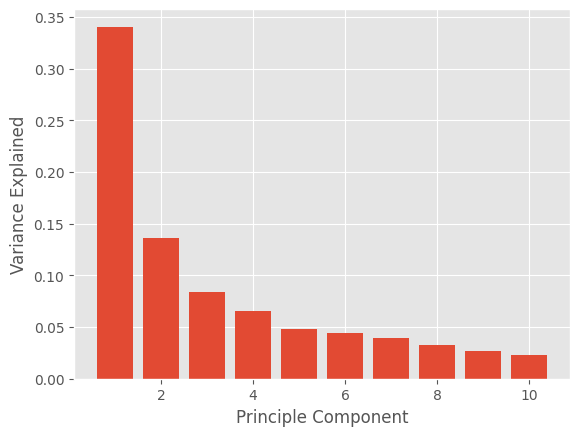

In [22]:
pca = PCA(10)
pca.fit(x_train)
plt.bar([i for i in range(1,11)], pca.explained_variance_ratio_)
plt.ylabel("Variance Explained")
plt.xlabel("Principle Component")
plt.show()


In [23]:
x_train_pca = pca.transform(x_train)

In [33]:
x_train_pca = np.hstack([x_train_pca, np.array([[1] for i in range(len(y_train))])])
linear_model = sm.OLS(y_train, x_train_pca, missing='drop', hasconst=False).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     log_incident_acres_burned   R-squared (uncentered):                   0.829
Model:                                   OLS   Adj. R-squared (uncentered):              0.828
Method:                        Least Squares   F-statistic:                              610.2
Date:                       Thu, 16 Nov 2023   Prob (F-statistic):                        0.00
Time:                               22:46:04   Log-Likelihood:                         -3098.1
No. Observations:                       1392   AIC:                                      6218.
Df Residuals:                           1381   BIC:                                      6276.
Df Model:                                 11                                                  
Covariance Type:                   nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0436      0.054     -0.812      0.417      -0.149       0.062
x2             0.0408      0.085      0.481      0.631      -0.126       0.207
x3             0.2600      0.108      2.409      0.016       0.048       0.472
x4            -0.0524      0.122     -0.429      0.668      -0.292       0.187
x5             0.5623      0.143      3.942      0.000       0.282       0.842
x6            -0.5101      0.148     -3.441      0.001      -0.801      -0.219
x7            -0.6268      0.157     -3.995      0.000      -0.935      -0.319
x8            -0.0825      0.172     -0.478      0.632      -0.421       0.256
x9             0.0239      0.191      0.125      0.900      -0.351       0.399
x10            0.3655      0.205      1.787      0.074      -0.036       0.767
const          4.9197      0.060     81.598      0.000       4.801       5.038
==============================================================================
Omnibus:                      123.939   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.598
Skew:                           0.678   Prob(JB):                     2.24e-40
Kurtosis:                       4.144   Cond. No.                         3.81
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
x_test_pca = np.hstack([pca.transform(x_test), np.array([[1] for i in range(len(y_test))])])
np.mean(np.power((linear_model.predict(x_test_pca) - y_test),2))

4.585618422514323